# Text Mining - Text Prepartaion with different Stemmers and Frequency Distribution

In [1]:
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords

In [2]:
#use nltk.download() and download only books. Using full download will takeup time and bandwidth
#nltk.download()

![title](img/nltk_download.png)

In [3]:
#get a demo article and load it to memory
data = open('Demo_Article.json','r')

In [4]:
data

<_io.TextIOWrapper name='Demo_Article.json' mode='r' encoding='UTF-8'>

In [5]:
# Load in the JSON object in the file
jdata = json.load(data)

# Extract the URL and the Text from within the JSON object
url=jdata['URL']
url

'http://www.slate.com/articles/life/food/2015/08/i_was_gluten_free_before_it_was_cool_diagnosed_with_celiac_in_the_1990s.html'

In [6]:
text=jdata['Text']
#text

In [7]:
type(text)

str

In [8]:
len(text)

9336

In [9]:
# Conver the free text into tokens
tokens = word_tokenize(text)
type(tokens)

list

In [10]:
#identify unique words and single char words
print(len(tokens))
unique = set(tokens)
print('# of Unique tokens',len(unique))
print('# of tokens / len of unique tokens',len(tokens)/len(unique))

1855
# of Unique tokens 815
# of tokens / len of unique tokens 2.276073619631902


In [11]:
#lets sort here
sorted(unique)
single=[w for w in unique if len(w) == 1 ]
print(len(single))
single

20


['t',
 '(',
 ';',
 'd',
 'm',
 'A',
 '”',
 ':',
 ')',
 '?',
 '2',
 '/',
 '“',
 ',',
 's',
 '9',
 'I',
 'a',
 '.',
 '’']

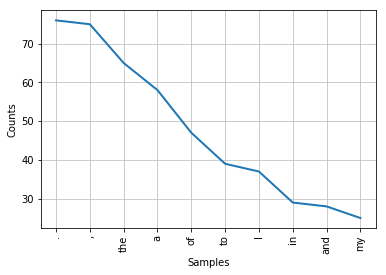

In [12]:
# Frequency distribution of the words
%matplotlib inline
tokens.count('gluten')
fd = nltk.FreqDist(tokens)
fd.most_common(10)
fd.plot(10)

In [13]:
# How long are the words?
fd_wlen = nltk.FreqDist([len(w) for w in unique])
fd_wlen

FreqDist({1: 20,
          2: 38,
          3: 79,
          4: 133,
          5: 120,
          6: 110,
          7: 98,
          8: 69,
          9: 49,
          10: 37,
          11: 28,
          12: 12,
          13: 12,
          14: 6,
          15: 1,
          16: 1,
          20: 1,
          21: 1})

In [14]:
#bigrams and trigrams
bigr = nltk.bigrams(tokens) #[:10]
trigr = nltk.trigrams(tokens)
#tokens[:10]
#list(bigr)
#list(trigr)

In [15]:
#text preprocessing: remove punctuations
tokens_nop = [ t for t in tokens if t not in string.punctuation ]

In [16]:
# Convert all characters to Lower case
tokens_lower=[ t.lower() for t in tokens_nop ]

In [17]:
# Create a stopword list from the standard list of stopwords available in nltk
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
# Remove all these stopwords from the text
tokens_nostop=[ t for t in tokens_lower if t not in stop ]

In [19]:
FreqDist(tokens_nostop).most_common(10)

[('gluten', 23),
 ('’', 23),
 ('“', 23),
 ('”', 23),
 ('like', 10),
 ('food', 8),
 ('gluten-free', 7),
 ('celiac', 5),
 ('would', 5),
 ('one', 5)]

# Below section we will try different stemmer

In [20]:
porter = nltk.PorterStemmer()
tokens_porter=[ porter.stem(t) for t in tokens_nostop ] 
print(tokens_nostop[:10])
print(tokens_porter[:10])

['gluten', 'turns', 'actual', 'grain', 'visible', 'ingredient', 'substance', 'made', 'two', 'proteins']
['gluten', 'turn', 'actual', 'grain', 'visibl', 'ingredi', 'substanc', 'made', 'two', 'protein']


In [21]:
# The Lancaster Stemmer - developed at Lancaster University
lancaster = nltk.LancasterStemmer()
tokens_lanc = [ lancaster.stem(t) for t in tokens_nostop ] 
print(tokens_lanc[:10])

['glut', 'turn', 'act', 'grain', 'vis', 'ingredy', 'subst', 'mad', 'two', 'protein']


In [22]:
# The snowball stemmer -  which supports 13 non-English languages as well!
snowball = nltk.SnowballStemmer('english')
tokens_snow = [ snowball.stem(t) for t in tokens_nostop ]
print(tokens_snow[:10])

['gluten', 'turn', 'actual', 'grain', 'visibl', 'ingredi', 'substanc', 'made', 'two', 'protein']


In [23]:
# Now, for Lemmatization, which converts each word to it's corresponding lemma, use the Lemmatizer provided by nltk
wnl = nltk.WordNetLemmatizer()
tokens_lem = [ wnl.lemmatize(t) for t in tokens_nostop ]
print(tokens_lem[:25])

['gluten', 'turn', 'actual', 'grain', 'visible', 'ingredient', 'substance', 'made', 'two', 'protein', 'give', 'dough', 'elasticity', 'celiac', 'autoimmune', 'disorder', 'gluten', 'wreaks', 'havoc', 'small', 'intestine', 'blocking', 'nutrient', 'absorbed', 'diagnosed']


In [24]:
# Check the lemmatization results. Why are some words not lemmatized?
# The reason is it needs to know the POS of the words. The default is 'n'.
# We'll learn how to do POS tagging later.
print(wnl.lemmatize('absorbed', pos = 'v'))
print(wnl.lemmatize('better', pos = 'a'))

absorb
good


In [25]:
# Let's use Snowball Stemmer's result.
# Further cleaning: filter off anything with less than 3 characters
nltk.FreqDist(tokens_snow).most_common(100)
tokens_clean = [ t for t in tokens_snow if len(t) >= 3 ]
len(tokens_snow)
len(tokens_clean)
nltk.FreqDist(tokens_clean).most_common(50)
fd_clean = nltk.FreqDist(tokens_clean)

In [26]:
#below section is for Word Cloud
text_clean=" ".join(tokens_clean)

In [27]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

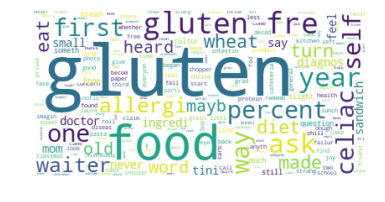

In [28]:
wc = WordCloud(background_color="white").generate(text_clean)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

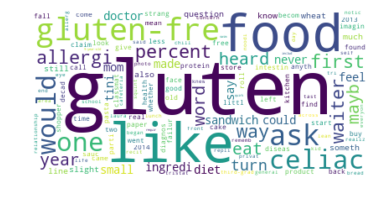

In [29]:
# We can also generate directly from the frequency information
wc2 = WordCloud(background_color="white")
wc2.generate_from_frequencies(fd_clean)
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()

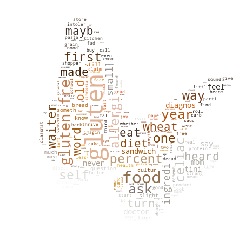

In [30]:
#Cloud with customized shape and color
mask = np.array(Image.open("./fly.png"))
image_colors = ImageColorGenerator(mask)

wc3 = WordCloud(background_color='white', mask=mask).generate(text_clean)

plt.imshow(wc3.recolor(color_func=image_colors))
plt.axis("off")
plt.show()